In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#####################请修改成自己存储数据的路径名####################################
print(os.listdir("B:/pycharm/project/jx/1021shuju"))
print(os.listdir("B:/pycharm/project/jx/1021shuju/bike-sharing-dataset"))
#####################请修改成自己存储数据的路径名####################################
# Any results you write to the current directory are saved as output.

['bike-sharing-dataset', 'data.csv', 'heart.csv']
['day.csv', 'hour.csv']


In [10]:
#############################将hour.csv文件读入到raw###########################################
raw = pd.read_csv("B:/pycharm/project/jx/1021shuju/bike-sharing-dataset/hour.csv")
#############################将hour.csv文件读入到raw###########################################

## Now, we are going to explore that data and understand it. The description reads as this

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [11]:
#####################实现功能：查看读入数据的前5行###################################
raw.head()
#####################实现功能：查看读入数据的前5行###################################

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Lets get a deeper look

In [4]:
raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##  Lets check the categorical variables now.

### We have some variables such as the week days in which we do NOT really want to use numbers, but we just simply want to denotate whether or not a bicycle was used in a given day (Monday, Tuesday). At the moment that is done by assigning to the column "weekday" a value between 0 and 6, we want to change that... lets use dummy variables

In [12]:
def generate_dummies(df, dummy_column):
    #####################实现功能：将dummy_column中的特征转变成one-hot特征###################################
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    #####################实现功能：将dummy_column中的特征转变成one-hot特征###################################
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(raw)
dummy_columns = ["season",     # season (1:springer, 2:summer, 3:fall, 4:winter)
                 "yr",          # year (0: 2011, 1:2012)
                 "mnth",        # month ( 1 to 12)
                 "hr",          # hour (0 to 23)
                 "weekday",     # weekday : day of the week
                 "weathersit"   # weathersit : 
                                 # - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                                 # - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                                 # - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                                 # - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
                ]
for dummy_column in dummy_columns:
    X = generate_dummies(X, dummy_column)

In [13]:
X.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,1,1,0,0,0


In [14]:
X.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_1', 'season_2', 'season_3',
       'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

## Now we need to drop the columns used originally for dummies, notice that now we have weekday_0, weekday_1 ... weekday_6, which represents Sunday to Monday (personal note here!!: I am Spanish and in Spain weekday 0 would be Monday... in English however the first day of the week is Sunday... keep in in mind!)

### In any case, despite having weekday_1... weekday_6 we still have the column weekday, which is of no use already, so lets remove it along with the rest of dummy columns

In [15]:
for dummy_column in dummy_columns:
     #####################实现功能：删除X中的第dummy_column列###################################
    del X[dummy_column]
    #####################实现功能：删除X中的第dummy_column列###################################
X.columns

Index(['instant', 'dteday', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_1', 'season_2',
       'season_3', 'season_4', 'yr_0', 'yr_1', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
       'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
       'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
       'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4'],
      dtype='object')

### And now, lets see how our data looks like

In [16]:
X.head()

,instant,dteday,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0.24,0.2879,0.81,0.0,3,13,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,0,0.22,0.2727,0.80,0.0,8,32,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,0,0.22,0.2727,0.80,0.0,5,27,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,0,0.24,0.2879,0.75,0.0,3,10,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,0,0.24,0.2879,0.75,0.0,0,1,...,0,0,0,0,0,1,1,0,0,0


In [10]:
X.describe()

,instant,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,...,0.142643,0.141147,0.142413,0.142183,0.143104,0.144542,0.656712,0.261465,0.081650,0.000173
std,5017.0295,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,...,0.349719,0.348184,0.349484,0.349248,0.350189,0.351649,0.474820,0.439445,0.273839,0.013138
min,1.0000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8690.0000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,13034.5000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,17379.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Time for us to plot some data and get an idea of what's going on here

In [17]:
first_3_weeks = 3*7*24 # 3 weeks (7 days), 24 hours each day
#####################实现功能：对X中前first_3_weeks数据画图，x轴为dteday，y轴为cnt，size为（18，5）###################################
X[:first_3_weeks].plot(x='dteday', y='cnt', figsize=(18, 5))
#####################实现功能：对X中前first_3_weeks数据画图，x轴为dteday，y轴为cnt，size为（18，5）###################################

### It is also obvious that we do not need the "instant", "'dteday" columns, lets remove them

In [18]:
del X["instant"]
del X["dteday"]

### Finally, we need to declare which one will be our "target" column, that is, what do we want to predict? in this case it would be either "casual", "registered" or "cnt". I will use "cnt"

In [19]:
y = X["cnt"]
del X["cnt"]
del X["registered"]
del X["casual"]

In [20]:
X.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.2879,0.81,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0.22,0.2727,0.80,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0.24,0.2879,0.75,0.0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0


## We will now split into train data and test data, using 70% as train data

In [21]:
all_days = len(X) // 24
print("Total observations", len(X))
print("Total number of days", all_days)
days_for_training = int(len(X) * 0.7)
#####################实现功能：X_train赋值为X中的前days_for_training行数据，X_test赋值为其余数据###################################
X_train = X[0:days_for_training]
X_test = X[days_for_training:]
#####################实现功能：X_train赋值为X中的前days_for_training行数据，X_test赋值为其余数据###################################

Total observations 17379
Total number of days 724


In [22]:
print("Observations for training", len(X_train))
print("Observations for testing", len(X_test))
print("Some target values", y.head())

Observations for training 12165
Observations for testing 5214
Some target values 0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64


### We still need to normalize our target values!

In [24]:
#####################实现功能：将y进行最小最大标准化###################################
y_normalized = (y - y.min()) / (y.max() - y.min())
#####################实现功能：将y进行最小最大标准化###################################
y_normalized.head()

y_train = y[0:days_for_training]
y_test = y[days_for_training:]
y_train_normalized = y_normalized[0:days_for_training]
y_test_normalized = y_normalized[days_for_training:]

## We will now build a simple model

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
features = X.shape[1]
model = Sequential()
model.add(Dense(13, input_shape=(features,), activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(1, activation='linear')) 

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                780       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 794
Trainable params: 794
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.optimizers import SGD
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss="mean_squared_error")

In [27]:
results = model.fit(X_train, y_train_normalized, epochs=150,validation_data = (X_test, y_test_normalized))

Train on 12165 samples, validate on 5214 samples
Epoch 1/150
12165/12165 [==============================] - 3s 211us/step - loss: 0.0698 - val_loss: 0.0645
Epoch 2/150
12165/12165 [==============================] - 2s 158us/step - loss: 0.0288 - val_loss: 0.0614
Epoch 3/150
12165/12165 [==============================] - 2s 130us/step - loss: 0.0263 - val_loss: 0.0595
Epoch 4/150
12165/12165 [==============================] - 2s 171us/step - loss: 0.0257 - val_loss: 0.0588
Epoch 5/150
12165/12165 [==============================] - 2s 137us/step - loss: 0.0253 - val_loss: 0.0617
Epoch 6/150
12165/12165 [==============================] - 2s 133us/step - loss: 0.0250 - val_loss: 0.0602
Epoch 7/150
12165/12165 [==============================] - 2s 140us/step - loss: 0.0246 - val_loss: 0.0607
Epoch 8/150
12165/12165 [==============================] - 1s 116us/step - loss: 0.0246 - val_loss: 0.0596
Epoch 9/150
12165/12165 [==============================] - 2s 180us/step - loss: 0.0246 - val_l

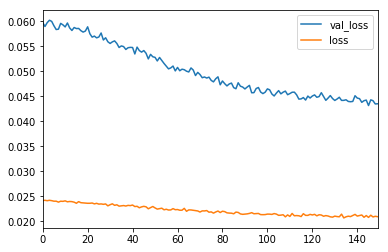

In [26]:
results.history
pd.DataFrame.from_dict(results.history).plot()

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y_test_normalized=np.array(y_test_normalized)
y_pred = model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test_normalized, y_pred))
r2 = r2_score(y_test_normalized, y_pred, multioutput='raw_values')

print("RMSE:",rmse)
print("R2:",r2)


RMSE: 0.20853825503616216
R2: [0.14701181]
